First few rows of the dataset:
   daily_usage_hours  site_categories_visited  sessions_per_day
0           9.884957                        2                13
1           1.023220                        9                 1
2          10.394205                        9                 3
3           5.990237                        6                16
4           3.558451                        4                 4


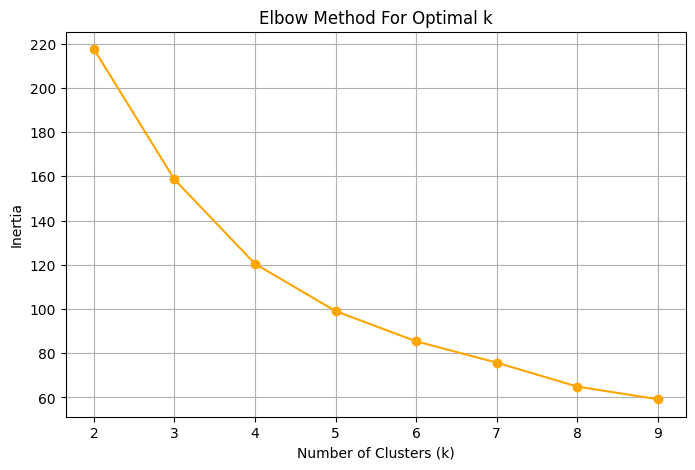

Silhouette Score for k=3: 0.30


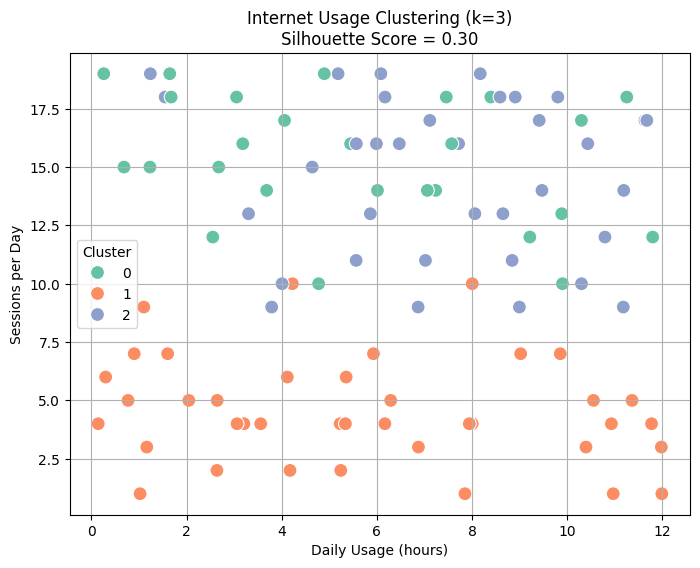

In [3]:
# Internet Usage Clustering using KMeans

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset
file_path = 'internet_usage.csv'  # Make sure the CSV is uploaded to Colab
df = pd.read_csv(file_path)

# Step 2: Display basic information
print("First few rows of the dataset:")
print(df.head())

# Step 3: Feature scaling using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Step 4: Determine the optimal number of clusters (Elbow Method)
inertia = []
range_n_clusters = range(2, 10)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', color='orange')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Step 5: Apply KMeans with optimal k (chosen as 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 6: Evaluate with silhouette score
sil_score = silhouette_score(scaled_features, df['Cluster'])
print(f"Silhouette Score for k={k}: {sil_score:.2f}")

# Step 7: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='daily_usage_hours',
    y='sessions_per_day',
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title(f'Internet Usage Clustering (k={k})\nSilhouette Score = {sil_score:.2f}')
plt.xlabel('Daily Usage (hours)')
plt.ylabel('Sessions per Day')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# New Section